<a href="https://colab.research.google.com/github/andrian2020/Skill_github/blob/master/%D0%9E%D1%87%D0%B8%D1%81%D1%82%D0%BA%D0%B0_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%D0%BF%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.float_format', lambda x: f'{x:.2f}')
from pylab import rcParams
rcParams['figure.figsize'] = 11,5

Посмотрим на данные поближе


In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/obulygin/SkillFactory/main/melb_data.csv')

In [5]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,2.00,1.00,1.00,202.00,nan,nan,Yarra,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,2.00,1.00,0.00,156.00,79.00,1900.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00
2,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,0.00,134.00,150.00,1900.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,40 Federation La,3,h,850000.00,PI,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,1.00,94.00,nan,nan,Yarra,-37.80,145.00,Northern Metropolitan,4019.00
4,Abbotsford,55a Park St,4,h,1600000.00,VB,Nelson,4/06/2016,2.50,3067.00,3.00,1.00,2.00,120.00,142.00,2014.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [7]:
data['Price'].describe()

count     13580.00
mean    1075684.08
std      639310.72
min       85000.00
25%      650000.00
50%      903000.00
75%     1330000.00
max     9000000.00
Name: Price, dtype: float64

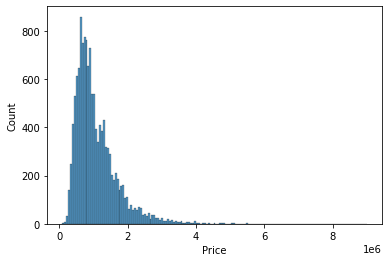

In [8]:
sns.histplot(data['Price'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


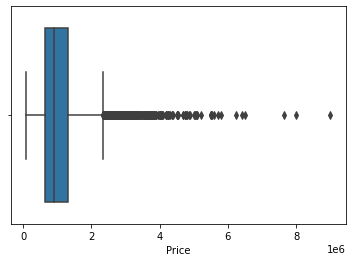

In [9]:
sns.boxplot(data['Price'])

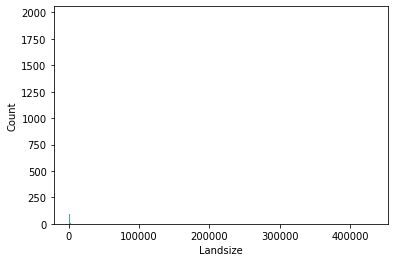

In [10]:
sns.histplot(data['Landsize'])

график не красиво отобразился из-за того, то есть значения, которые сильно выбиваются из общей массы, посмотрим их

In [11]:
data['Landsize'].describe()

count    13580.00
mean       558.42
std       3990.67
min          0.00
25%        177.00
50%        440.00
75%        651.00
max     433014.00
Name: Landsize, dtype: float64

In [12]:
data[data['Landsize']>300e3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
11020,Fitzroy,389 Gore St,3,h,2700000.00,VB,Kay,12/08/2017,2.10,3065.00,3.00,3.00,1.00,433014.00,nan,nan,Yarra,-37.80,144.98,Northern Metropolitan,5825.00


Удалим этот выброс и снова построим график

In [13]:
data = data[data['Landsize']<10e3]

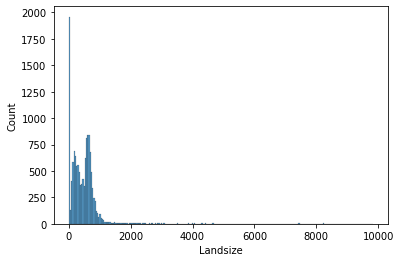

In [14]:
sns.histplot(data['Landsize'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


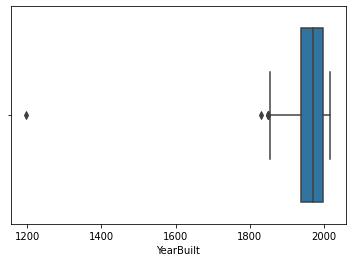

In [15]:
sns.boxplot(data['YearBuilt'])


In [16]:
data[data['YearBuilt']<1400]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
9968,Mount Waverley,5 Armstrong St,3,h,1200000.00,VB,McGrath,24/06/2017,14.20,3149.00,3.00,1.00,4.00,807.00,117.00,1196.00,Monash,-37.87,145.12,Eastern Metropolitan,13366.00


In [17]:
data = data[data['YearBuilt']>1835]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


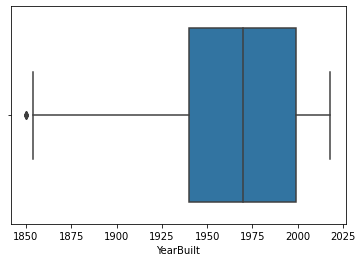

In [18]:
sns.boxplot(data['YearBuilt'])

В ящиках с усами выбросы определяются по формуле межквартильного размаха.

In [19]:
q1 = data['YearBuilt'].quantile(0.25)
q2 = data['YearBuilt'].quantile(0.75)
iqr = q2-q1
lower_bound = q1-(1.5*iqr)
upper_bound = q2+(1.5*iqr)
display(data[~data['YearBuilt'].between(lower_bound, upper_bound, inclusive = True)])

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2554,Fitzroy,11 Henry St,2,h,677000.00,S,Chambers,27/11/2016,1.60,3065.00,2.00,1.00,0.00,67.00,nan,1850.00,Yarra,-37.80,144.98,Northern Metropolitan,5825.00
4843,Prahran,602/220 Commercial Rd,2,u,841000.00,S,hockingstuart,18/03/2017,4.50,3181.00,2.00,2.00,1.00,0.00,101.00,1850.00,Stonnington,-37.85,144.99,Southern Metropolitan,7717.00
5405,Richmond,22a Stanley St,3,h,1600000.00,S,Biggin,24/09/2016,2.60,3121.00,3.00,2.00,2.00,80.00,144.00,1850.00,Yarra,-37.82,144.99,Northern Metropolitan,14949.00
5860,St Kilda,51/167 Fitzroy St,3,u,1600000.00,PI,Kay,25/02/2017,6.10,3182.00,3.00,2.00,2.00,0.00,3.00,1850.00,Port Phillip,-37.86,144.98,Southern Metropolitan,13240.00


In [ ]:
Можно написать цикл по всем числовым столбцам


In [21]:
for column in data.select_dtypes(include = [np.number]).columns:
    q1 = data[column].quantile(0.25)
    q2 = data[column].quantile(0.75)
    iqr = q2-q1
    lower_bound = q1-(1.5*iqr)
    upper_bound = q2+(1.5*iqr)
    print(column)
    display(data[~data[column].between(lower_bound, upper_bound, inclusive = True)])

Rooms


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
379,Ashburton,115 Ashburn Gr,8,h,2950000.00,S,hockingstuart,10/09/2016,11.00,3147.00,9.00,7.00,4.00,1472.00,618.00,2009.00,Boroondara,-37.87,145.08,Southern Metropolitan,3052.00
3255,Heidelberg Heights,478 Waterdale Rd,8,h,770000.00,VB,Miles,19/11/2016,10.50,3081.00,8.00,4.00,4.00,638.00,115.00,1960.00,Banyule,-37.74,145.05,Eastern Metropolitan,2947.00
4285,Newport,487 Melbourne Rd,8,h,881000.00,S,Jas,30/07/2016,8.40,3015.00,6.00,2.00,4.00,663.00,190.00,1920.00,Hobsons Bay,-37.84,144.88,Western Metropolitan,5498.00
11304,Bundoora,5 Ball Ct,10,h,900000.00,PI,Ray,15/07/2017,12.10,3083.00,10.00,3.00,2.00,313.00,nan,2006.00,Darebin,-37.71,145.05,Northern Metropolitan,10175.00
13226,Meadow Heights,13 Haddon Ct,8,h,741000.00,S,Barry,23/09/2017,17.40,3048.00,8.00,3.00,1.00,1063.00,101.00,1980.00,NaN,-37.66,144.93,Northern Metropolitan,4704.00


Price


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
80,Albert Park,112 Beaconsfield Pde,3,h,2850000.00,PI,Buxton,4/03/2017,3.30,3206.00,3.00,2.00,0.00,211.00,198.00,1890.00,Port Phillip,-37.85,144.95,Southern Metropolitan,3280.00
92,Albert Park,2 Dundas Pl,3,h,2615000.00,S,Cayzer,10/12/2016,3.30,3206.00,3.00,2.00,1.00,177.00,181.00,1880.00,Port Phillip,-37.84,144.96,Southern Metropolitan,3280.00
102,Albert Park,97 Page St,3,h,3010000.00,S,Greg,18/03/2017,3.30,3206.00,3.00,2.00,0.00,147.00,146.00,1890.00,Port Phillip,-37.85,144.96,Southern Metropolitan,3280.00
103,Albert Park,55 Withers St,4,h,2800000.00,VB,Cayzer,18/06/2016,3.30,3206.00,4.00,3.00,1.00,327.00,254.00,1910.00,Port Phillip,-37.85,144.95,Southern Metropolitan,3280.00
108,Albert Park,115 Page St,4,h,4735000.00,S,Marshall,25/02/2017,3.30,3206.00,4.00,2.00,1.00,330.00,207.00,1910.00,Port Phillip,-37.85,144.96,Southern Metropolitan,3280.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13483,Maribyrnong,88 The Esplanade,3,h,3400000.00,SP,Jas,26/08/2017,4.30,3032.00,3.00,1.00,5.00,2027.00,187.00,1964.00,NaN,-37.77,144.89,Western Metropolitan,4918.00
13518,Parkdale,63 The Corso,4,h,2475000.00,PI,Buxton,26/08/2017,21.50,3195.00,4.00,3.00,3.00,665.00,450.00,2016.00,NaN,-38.00,145.08,South-Eastern Metropolitan,5087.00
13521,Port Melbourne,44 Garton St,4,t,2455000.00,SP,Marshall,26/08/2017,3.50,3207.00,4.00,3.00,2.00,123.00,0.00,2010.00,NaN,-37.83,144.95,Southern Metropolitan,8648.00
13553,Surrey Hills,20 Albert Cr,4,h,2720000.00,S,Kay,26/08/2017,10.20,3127.00,4.00,3.00,2.00,1005.00,nan,1920.00,NaN,-37.82,145.10,Southern Metropolitan,5457.00


Distance


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
8787,Dandenong North,110 Gladstone Rd,3,h,627000.00,S,Barry,1/07/2017,24.70,3175.00,3.00,1.00,1.00,610.00,120.00,1970.00,Greater Dandenong,-37.96,145.21,South-Eastern Metropolitan,8322.00
8794,Doreen,33 Starboard Dr,3,h,530500.00,S,Buckingham,1/07/2017,25.90,3754.00,3.00,2.00,2.00,400.00,179.00,2012.00,Whittlesea,-37.61,145.12,Northern Victoria,7254.00
8815,Frankston North,17 Windoo St,3,h,611000.00,S,Ray,1/07/2017,36.90,3200.00,3.00,2.00,1.00,691.00,109.00,1960.00,Frankston,-38.12,145.15,Eastern Victoria,2500.00
8816,Frankston South,14 Poinciana St,3,h,755000.00,S,hockingstuart,1/07/2017,38.00,3199.00,3.00,1.00,2.00,786.00,174.00,1960.00,Frankston,-38.16,145.13,South-Eastern Metropolitan,7566.00
8817,Gisborne,3 Sansom St,4,h,521000.00,SP,Raine,1/07/2017,45.90,3437.00,4.00,2.00,2.00,978.00,144.00,1980.00,Macedon Ranges,-37.50,144.60,Northern Victoria,3376.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13479,Langwarrin,83 Pindara Bvd,4,h,965000.00,PI,O'Brien,26/08/2017,41.00,3910.00,4.00,2.00,6.00,869.00,264.00,2007.00,NaN,-38.15,145.19,Eastern Victoria,8743.00
13487,Melton,21D Yuille St,5,h,710000.00,PI,Ryder,26/08/2017,31.70,3337.00,5.00,2.00,2.00,1670.00,280.00,2000.00,NaN,-37.68,144.59,Western Victoria,3600.00
13488,Melton South,1 Fraser St,3,h,395000.00,S,YPA,26/08/2017,29.80,3338.00,3.00,1.00,1.00,649.00,105.00,1975.00,NaN,-37.70,144.58,Western Victoria,4718.00
13540,Seaford,137 East Rd,3,h,512000.00,S,hockingstuart,26/08/2017,35.40,3198.00,3.00,1.00,1.00,576.00,105.00,1983.00,NaN,-38.11,145.15,South-Eastern Metropolitan,8077.00


Postcode


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
8794,Doreen,33 Starboard Dr,3,h,530500.00,S,Buckingham,1/07/2017,25.90,3754.00,3.00,2.00,2.00,400.00,179.00,2012.00,Whittlesea,-37.61,145.12,Northern Victoria,7254.00
8817,Gisborne,3 Sansom St,4,h,521000.00,SP,Raine,1/07/2017,45.90,3437.00,4.00,2.00,2.00,978.00,144.00,1980.00,Macedon Ranges,-37.50,144.60,Northern Victoria,3376.00
8835,Healesville,15A Westmount Rd,3,h,650000.00,SP,McGrath,1/07/2017,45.20,3777.00,3.00,2.00,4.00,724.00,156.60,2009.00,Yarra Ranges,-37.65,145.53,Northern Victoria,3307.00
8871,Melton,38 Gretel Gr,4,h,320000.00,SP,Raine,1/07/2017,31.70,3337.00,4.00,2.00,1.00,547.00,200.00,1986.00,Melton,-37.69,144.58,Western Victoria,3600.00
8872,Melton,21 Sandra St,3,h,480000.00,SP,PRDNationwide,1/07/2017,31.70,3337.00,3.00,1.00,2.00,900.00,100.00,1980.00,Melton,-37.69,144.57,Western Victoria,3600.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13446,Hampton Park,4 Somerville Rd,4,h,625000.00,S,Rexhepi,26/08/2017,33.30,3976.00,4.00,1.00,2.00,640.00,136.00,1960.00,NaN,-38.03,145.25,South-Eastern Metropolitan,8256.00
13479,Langwarrin,83 Pindara Bvd,4,h,965000.00,PI,O'Brien,26/08/2017,41.00,3910.00,4.00,2.00,6.00,869.00,264.00,2007.00,NaN,-38.15,145.19,Eastern Victoria,8743.00
13487,Melton,21D Yuille St,5,h,710000.00,PI,Ryder,26/08/2017,31.70,3337.00,5.00,2.00,2.00,1670.00,280.00,2000.00,NaN,-37.68,144.59,Western Victoria,3600.00
13488,Melton South,1 Fraser St,3,h,395000.00,S,YPA,26/08/2017,29.80,3338.00,3.00,1.00,1.00,649.00,105.00,1975.00,NaN,-37.70,144.58,Western Victoria,4718.00


Bedroom2


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
379,Ashburton,115 Ashburn Gr,8,h,2950000.00,S,hockingstuart,10/09/2016,11.00,3147.00,9.00,7.00,4.00,1472.00,618.00,2009.00,Boroondara,-37.87,145.08,Southern Metropolitan,3052.00
3255,Heidelberg Heights,478 Waterdale Rd,8,h,770000.00,VB,Miles,19/11/2016,10.50,3081.00,8.00,4.00,4.00,638.00,115.00,1960.00,Banyule,-37.74,145.05,Eastern Metropolitan,2947.00
4980,Preston,421 Murray Rd,4,h,760000.00,PI,Barry,22/05/2016,8.80,3072.00,9.00,8.00,7.00,1254.00,280.00,1928.00,Darebin,-37.74,144.99,Northern Metropolitan,14577.00
6915,Fawkner,39 Lynch Rd,3,h,751000.00,S,Stockdale,17/09/2016,12.40,3060.00,9.00,6.00,2.00,592.00,103.00,1960.00,Moreland,-37.71,144.97,Northern Metropolitan,5070.00
11304,Bundoora,5 Ball Ct,10,h,900000.00,PI,Ray,15/07/2017,12.10,3083.00,10.00,3.00,2.00,313.00,nan,2006.00,Darebin,-37.71,145.05,Northern Metropolitan,10175.00
13226,Meadow Heights,13 Haddon Ct,8,h,741000.00,S,Barry,23/09/2017,17.40,3048.00,8.00,3.00,1.00,1063.00,101.00,1980.00,NaN,-37.66,144.93,Northern Metropolitan,4704.00


Bathroom


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
124,Alphington,83 Fulham Rd,5,h,2840000.00,S,Nelson,12/06/2016,6.40,3078.00,5.00,4.00,4.00,809.00,165.00,1910.00,Darebin,-37.77,145.03,Northern Metropolitan,2211.00
379,Ashburton,115 Ashburn Gr,8,h,2950000.00,S,hockingstuart,10/09/2016,11.00,3147.00,9.00,7.00,4.00,1472.00,618.00,2009.00,Boroondara,-37.87,145.08,Southern Metropolitan,3052.00
388,Ashburton,29A Yuile St,5,h,3510000.00,S,Jellis,18/03/2017,11.00,3147.00,5.00,5.00,2.00,755.00,444.00,2015.00,Boroondara,-37.86,145.08,Southern Metropolitan,3052.00
392,Ashburton,15 Comas Gr,5,h,2752000.00,S,Jellis,22/08/2016,11.00,3147.00,6.00,4.00,2.00,1075.00,390.00,2010.00,Boroondara,-37.87,145.07,Southern Metropolitan,3052.00
515,Balwyn,349 Union Rd,6,h,4000000.00,VB,Jellis,3/12/2016,9.70,3103.00,6.00,4.00,7.00,2051.00,449.00,1935.00,Boroondara,-37.81,145.10,Southern Metropolitan,5682.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12793,Mount Waverley,37 Illuka Cr,5,h,2420000.00,SP,LLC,16/09/2017,14.20,3149.00,5.00,5.00,2.00,757.00,503.00,1975.00,NaN,-37.89,145.14,Eastern Metropolitan,13366.00
12931,Caulfield South,37 Saturn St,5,h,2450000.00,PI,Gary,19/08/2017,8.70,3162.00,5.00,4.00,2.00,554.00,312.00,2017.00,NaN,-37.90,145.02,Southern Metropolitan,5051.00
12969,Essendon,83 Nimmo St,4,h,1600000.00,S,Nelson,19/08/2017,7.50,3040.00,4.00,4.00,3.00,543.00,259.00,2015.00,NaN,-37.75,144.90,Western Metropolitan,9264.00
13087,Aberfeldie,10 Caroline St,5,h,1830000.00,S,Rendina,23/09/2017,7.50,3040.00,5.00,4.00,4.00,730.00,373.00,2014.00,NaN,-37.76,144.89,Western Metropolitan,1543.00


Car


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
51,Airport West,3 Deidre Ct,3,h,895000.00,PI,Rendina,10/09/2016,13.50,3042.00,3.00,1.00,6.00,1063.00,133.00,1975.00,Moonee Valley,-37.72,144.87,Western Metropolitan,3464.00
61,Airport West,138 Victory Rd,3,h,1042000.00,S,Nelson,16/07/2016,13.50,3042.00,3.00,2.00,5.00,612.00,174.00,1950.00,Moonee Valley,-37.72,144.88,Western Metropolitan,3464.00
63,Airport West,6 Kittyhawk St,4,h,773000.00,S,Brad,17/09/2016,13.50,3042.00,5.00,3.00,4.00,531.00,309.00,1980.00,Moonee Valley,-37.73,144.87,Western Metropolitan,3464.00
120,Alphington,6 Smith St,4,h,2000000.00,S,Brace,3/09/2016,6.40,3078.00,3.00,2.00,4.00,853.00,263.00,1930.00,Darebin,-37.77,145.03,Northern Metropolitan,2211.00
124,Alphington,83 Fulham Rd,5,h,2840000.00,S,Nelson,12/06/2016,6.40,3078.00,5.00,4.00,4.00,809.00,165.00,1910.00,Darebin,-37.77,145.03,Northern Metropolitan,2211.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13524,Prahran,17 Packington Pl,2,h,1365000.00,S,Jellis,26/08/2017,4.60,3181.00,2.00,1.00,nan,206.00,100.00,1900.00,NaN,-37.86,145.01,Southern Metropolitan,7717.00
13527,Reservoir,1 Don St,4,h,1112000.00,S,RW,26/08/2017,12.00,3073.00,4.00,2.00,10.00,1002.00,170.00,1985.00,NaN,-37.71,145.03,Northern Metropolitan,21650.00
13535,Rosanna,30 Phillips Cr,4,h,1426000.00,S,Nelson,26/08/2017,8.90,3084.00,4.00,2.00,4.00,621.00,nan,1980.00,NaN,-37.74,145.07,Eastern Metropolitan,3540.00
13577,Williamstown,83 Power St,3,h,1170000.00,S,Raine,26/08/2017,6.80,3016.00,3.00,2.00,4.00,436.00,nan,1997.00,NaN,-37.85,144.89,Western Metropolitan,6380.00


Landsize


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
234,Armadale,526 Orrong Rd,4,h,3000000.00,VB,Jellis,4/06/2016,6.30,3143.00,4.00,2.00,2.00,1581.00,nan,1934.00,Stonnington,-37.86,145.01,Southern Metropolitan,4836.00
236,Armadale,9/19 Mercer Rd,3,u,735000.00,PI,Marshall,7/05/2016,6.30,3143.00,3.00,2.00,1.00,2113.00,14.00,1970.00,Stonnington,-37.85,145.03,Southern Metropolitan,4836.00
251,Armadale,367 Dandenong Rd,6,h,5525000.00,S,Marshall,17/09/2016,6.30,3143.00,5.00,3.00,4.00,1491.00,516.00,1935.00,Stonnington,-37.86,145.01,Southern Metropolitan,4836.00
266,Armadale,10/51 Armadale St,2,u,710000.00,S,Jellis,25/02/2017,6.30,3143.00,2.00,1.00,1.00,2471.00,80.00,1970.00,Stonnington,-37.86,145.02,Southern Metropolitan,4836.00
347,Ascot Vale,18/54 Epsom Rd,2,u,390000.00,PI,Jellis,25/02/2017,5.90,3032.00,2.00,1.00,1.00,1957.00,69.00,2012.00,Moonee Valley,-37.77,144.91,Western Metropolitan,6567.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13410,Eltham North,45 Allison Cr,4,h,905000.00,S,Buckingham,26/08/2017,18.00,3095.00,4.00,2.00,0.00,2000.00,153.00,1975.00,NaN,-37.70,145.14,Eastern Metropolitan,2346.00
13429,Frankston South,3 Diosma Ct,3,h,1155000.00,S,hockingstuart,26/08/2017,38.00,3199.00,3.00,2.00,2.00,2405.00,242.00,1980.00,NaN,-38.16,145.12,South-Eastern Metropolitan,7566.00
13483,Maribyrnong,88 The Esplanade,3,h,3400000.00,SP,Jas,26/08/2017,4.30,3032.00,3.00,1.00,5.00,2027.00,187.00,1964.00,NaN,-37.77,144.89,Western Metropolitan,4918.00
13487,Melton,21D Yuille St,5,h,710000.00,PI,Ryder,26/08/2017,31.70,3337.00,5.00,2.00,2.00,1670.00,280.00,2000.00,NaN,-37.68,144.59,Western Victoria,3600.00


BuildingArea


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
21,Abbotsford,13/11 Nicholson St,3,t,900000.00,S,Beller,18/03/2017,2.50,3067.00,3.00,2.00,2.00,0.00,nan,2010.00,Yarra,-37.81,145.00,Northern Metropolitan,4019.00
58,Airport West,4/54 Hawker St,2,u,462500.00,S,Barry,16/07/2016,13.50,3042.00,2.00,1.00,1.00,164.00,nan,2003.00,Moonee Valley,-37.72,144.89,Western Metropolitan,3464.00
63,Airport West,6 Kittyhawk St,4,h,773000.00,S,Brad,17/09/2016,13.50,3042.00,5.00,3.00,4.00,531.00,309.00,1980.00,Moonee Valley,-37.73,144.87,Western Metropolitan,3464.00
83,Albert Park,75 Graham St,2,h,1110000.00,S,Marshall,6/08/2016,3.30,3206.00,1.00,1.00,0.00,147.00,nan,1900.00,Port Phillip,-37.84,144.95,Southern Metropolitan,3280.00
101,Albert Park,129 Kerferd Rd,3,h,1900000.00,S,Greg,18/03/2017,3.30,3206.00,3.00,1.00,0.00,209.00,nan,1900.00,Port Phillip,-37.85,144.95,Southern Metropolitan,3280.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13553,Surrey Hills,20 Albert Cr,4,h,2720000.00,S,Kay,26/08/2017,10.20,3127.00,4.00,3.00,2.00,1005.00,nan,1920.00,NaN,-37.82,145.10,Southern Metropolitan,5457.00
13557,Templestowe,10 Hathaway Cl,4,h,1753000.00,S,Barry,26/08/2017,15.50,3106.00,4.00,2.00,2.00,689.00,nan,2012.00,NaN,-37.77,145.17,Eastern Metropolitan,6202.00
13560,Templestowe Lower,50 Caroline Dr,5,h,1400000.00,S,Barry,26/08/2017,12.40,3107.00,5.00,3.00,2.00,717.00,310.00,1963.00,NaN,-37.77,145.11,Eastern Metropolitan,5420.00
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.00,S,Barry,26/08/2017,16.70,3150.00,4.00,2.00,2.00,652.00,nan,1981.00,NaN,-37.91,145.17,South-Eastern Metropolitan,7392.00


YearBuilt


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2554,Fitzroy,11 Henry St,2,h,677000.00,S,Chambers,27/11/2016,1.60,3065.00,2.00,1.00,0.00,67.00,nan,1850.00,Yarra,-37.80,144.98,Northern Metropolitan,5825.00
4843,Prahran,602/220 Commercial Rd,2,u,841000.00,S,hockingstuart,18/03/2017,4.50,3181.00,2.00,2.00,1.00,0.00,101.00,1850.00,Stonnington,-37.85,144.99,Southern Metropolitan,7717.00
5405,Richmond,22a Stanley St,3,h,1600000.00,S,Biggin,24/09/2016,2.60,3121.00,3.00,2.00,2.00,80.00,144.00,1850.00,Yarra,-37.82,144.99,Northern Metropolitan,14949.00
5860,St Kilda,51/167 Fitzroy St,3,u,1600000.00,PI,Kay,25/02/2017,6.10,3182.00,3.00,2.00,2.00,0.00,3.00,1850.00,Port Phillip,-37.86,144.98,Southern Metropolitan,13240.00


Lattitude


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
8779,Craigieburn,13 Aston St,4,h,665000.00,PI,RE,1/07/2017,20.60,3064.00,4.00,2.00,2.00,756.00,236.00,2007.00,Hume,-37.59,144.90,Northern Metropolitan,15510.00
8780,Craigieburn,13 Brampton Cl,3,h,515500.00,S,RE,1/07/2017,20.60,3064.00,3.00,1.00,4.00,651.00,117.00,1990.00,Hume,-37.60,144.94,Northern Metropolitan,15510.00
8781,Craigieburn,6 Vision Rd,3,h,660000.00,S,LJ,1/07/2017,20.60,3064.00,3.00,2.00,3.00,618.00,225.50,2014.00,Hume,-37.60,144.90,Northern Metropolitan,15510.00
8815,Frankston North,17 Windoo St,3,h,611000.00,S,Ray,1/07/2017,36.90,3200.00,3.00,2.00,1.00,691.00,109.00,1960.00,Frankston,-38.12,145.15,Eastern Victoria,2500.00
8816,Frankston South,14 Poinciana St,3,h,755000.00,S,hockingstuart,1/07/2017,38.00,3199.00,3.00,1.00,2.00,786.00,174.00,1960.00,Frankston,-38.16,145.13,South-Eastern Metropolitan,7566.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13430,Frankston South,23 Fenton Cr,4,h,980000.00,S,hockingstuart,26/08/2017,38.00,3199.00,4.00,2.00,2.00,937.00,191.00,1960.00,NaN,-38.16,145.11,South-Eastern Metropolitan,7566.00
13446,Hampton Park,4 Somerville Rd,4,h,625000.00,S,Rexhepi,26/08/2017,33.30,3976.00,4.00,1.00,2.00,640.00,136.00,1960.00,NaN,-38.03,145.25,South-Eastern Metropolitan,8256.00
13479,Langwarrin,83 Pindara Bvd,4,h,965000.00,PI,O'Brien,26/08/2017,41.00,3910.00,4.00,2.00,6.00,869.00,264.00,2007.00,NaN,-38.15,145.19,Eastern Victoria,8743.00
13540,Seaford,137 East Rd,3,h,512000.00,S,hockingstuart,26/08/2017,35.40,3198.00,3.00,1.00,1.00,576.00,105.00,1983.00,NaN,-38.11,145.15,South-Eastern Metropolitan,8077.00


Longtitude


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
8733,Bayswater,18B Orchard Rd,3,t,640000.00,S,Fletchers,1/07/2017,23.20,3153.00,3.00,2.00,1.00,187.00,125.00,2010.00,Knox,-37.84,145.26,Eastern Metropolitan,5030.00
8734,Bayswater North,1/19 Glen Park Rd,3,u,500000.00,PI,Stockdale,1/07/2017,23.20,3153.00,3.00,1.00,2.00,263.00,nan,1970.00,Maroondah,-37.83,145.27,Eastern Metropolitan,3598.00
8783,Croydon,8 Banool Ct,4,h,932000.00,S,Hoskins,1/07/2017,23.00,3136.00,4.00,2.00,2.00,880.00,225.00,1970.00,Maroondah,-37.80,145.27,Eastern Metropolitan,11925.00
8784,Croydon,15 Ronald Rd,2,h,570000.00,SP,McGrath,1/07/2017,23.00,3136.00,2.00,1.00,1.00,312.00,110.00,1994.00,Maroondah,-37.81,145.27,Eastern Metropolitan,11925.00
8817,Gisborne,3 Sansom St,4,h,521000.00,SP,Raine,1/07/2017,45.90,3437.00,4.00,2.00,2.00,978.00,144.00,1980.00,Macedon Ranges,-37.50,144.60,Northern Victoria,3376.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13488,Melton South,1 Fraser St,3,h,395000.00,S,YPA,26/08/2017,29.80,3338.00,3.00,1.00,1.00,649.00,105.00,1975.00,NaN,-37.70,144.58,Western Victoria,4718.00
13533,Ringwood East,14 Everard Rd,2,h,937000.00,S,Carter,26/08/2017,21.30,3135.00,2.00,2.00,2.00,736.00,116.00,1960.00,NaN,-37.80,145.25,Eastern Metropolitan,4407.00
13548,Sunbury,64 Stewarts La,3,h,605000.00,S,One,26/08/2017,31.70,3429.00,3.00,2.00,2.00,755.00,229.00,1996.00,NaN,-37.57,144.71,Western Metropolitan,14092.00
13556,Tarneit,27 McMahon Cr,3,h,350000.00,VB,S&L,26/08/2017,18.40,3029.00,3.00,1.00,1.00,466.00,103.00,2003.00,NaN,-37.87,144.66,Western Metropolitan,10160.00


Propertycount


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
5029,Reservoir,1/21 Dumbarton St,3,u,475000.00,S,Ray,3/09/2016,11.20,3073.00,3.00,1.00,1.00,191.00,107.00,1990.00,Darebin,-37.70,145.03,Northern Metropolitan,21650.00
5030,Reservoir,1/147 Purinuan Rd,2,u,415000.00,PI,Ray,3/09/2016,11.20,3073.00,2.00,1.00,1.00,189.00,84.00,2012.00,Darebin,-37.71,145.02,Northern Metropolitan,21650.00
5031,Reservoir,30 Ashton St,3,h,731000.00,S,Barry,3/12/2016,11.20,3073.00,3.00,1.00,2.00,779.00,138.00,1950.00,Darebin,-37.73,145.02,Northern Metropolitan,21650.00
5032,Reservoir,2/20 Crookston Rd,2,u,352000.00,SP,Barry,3/12/2016,11.20,3073.00,2.00,1.00,1.00,117.00,62.00,2012.00,Darebin,-37.71,145.02,Northern Metropolitan,21650.00
5033,Reservoir,19 Drysdale St,3,h,723000.00,S,Ray,3/12/2016,11.20,3073.00,3.00,1.00,1.00,535.00,86.00,1950.00,Darebin,-37.73,145.02,Northern Metropolitan,21650.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13526,Reservoir,1E Black St,3,t,640000.00,PI,Ray,26/08/2017,12.00,3073.00,3.00,1.00,1.00,224.00,128.00,2008.00,NaN,-37.71,145.02,Northern Metropolitan,21650.00
13527,Reservoir,1 Don St,4,h,1112000.00,S,RW,26/08/2017,12.00,3073.00,4.00,2.00,10.00,1002.00,170.00,1985.00,NaN,-37.71,145.03,Northern Metropolitan,21650.00
13528,Reservoir,28 Manoel Av,4,h,852000.00,S,Stockdale,26/08/2017,12.00,3073.00,4.00,3.00,2.00,527.00,240.00,1980.00,NaN,-37.70,145.03,Northern Metropolitan,21650.00
13529,Reservoir,4 Newton St,3,h,800000.00,PI,Ray,26/08/2017,12.00,3073.00,3.00,1.00,2.00,585.00,90.00,1960.00,NaN,-37.73,145.03,Northern Metropolitan,21650.00


# Работа с пропусками

Посмотрим на количество пропусков в данных

In [22]:
(data.isna().mean() * 100).round(2)

Suburb           0.00
Address          0.00
Rooms            0.00
Type             0.00
Price            0.00
Method           0.00
SellerG          0.00
Date             0.00
Distance         0.00
Postcode         0.00
Bedroom2         0.00
Bathroom         0.00
Car              0.38
Landsize         0.00
BuildingArea    16.37
YearBuilt        0.00
CouncilArea      9.21
Lattitude        0.00
Longtitude       0.00
Regionname       0.00
Propertycount    0.00
dtype: float64

In [24]:
#Статистические методы игнорируют пропуски
print(data['BuildingArea'].mean())
print(data['BuildingArea'].median())
print(data['BuildingArea'].mode()[0])
print(data['BuildingArea'].std())
print(data['BuildingArea'].var())

143.3959137724551
126.0
120.0
89.866399648264
8075.969785741503


Удаление столбца с пропусками

In [25]:
# dropna удаляет все строки с пропущенными значениями
# в нашем случае это вряд ли адекватный вариант
reduced_data = data.dropna(axis = 1)
display(reduced_data)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Landsize,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,2.00,1.00,156.00,1900.00,-37.81,144.99,Northern Metropolitan,4019.00
2,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,134.00,1900.00,-37.81,144.99,Northern Metropolitan,4019.00
4,Abbotsford,55a Park St,4,h,1600000.00,VB,Nelson,4/06/2016,2.50,3067.00,3.00,1.00,120.00,2014.00,-37.81,144.99,Northern Metropolitan,4019.00
6,Abbotsford,124 Yarra St,3,h,1876000.00,S,Nelson,7/05/2016,2.50,3067.00,4.00,2.00,245.00,1910.00,-37.80,145.00,Northern Metropolitan,4019.00
7,Abbotsford,98 Charles St,2,h,1636000.00,S,Nelson,8/10/2016,2.50,3067.00,2.00,1.00,256.00,1890.00,-37.81,145.00,Northern Metropolitan,4019.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.00,S,Barry,26/08/2017,16.70,3150.00,4.00,2.00,652.00,1981.00,-37.91,145.17,South-Eastern Metropolitan,7392.00
13576,Williamstown,77 Merrett Dr,3,h,1031000.00,SP,Williams,26/08/2017,6.80,3016.00,3.00,2.00,333.00,1995.00,-37.86,144.88,Western Metropolitan,6380.00
13577,Williamstown,83 Power St,3,h,1170000.00,S,Raine,26/08/2017,6.80,3016.00,3.00,2.00,436.00,1997.00,-37.85,144.89,Western Metropolitan,6380.00
13578,Williamstown,96 Verdon St,4,h,2500000.00,PI,Sweeney,26/08/2017,6.80,3016.00,4.00,1.00,866.00,1920.00,-37.86,144.89,Western Metropolitan,6380.00


In [26]:
# удлаление строк с пропусками
data_reduced = data.dropna()
data_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6187 entries, 1 to 12212
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         6187 non-null   object 
 1   Address        6187 non-null   object 
 2   Rooms          6187 non-null   int64  
 3   Type           6187 non-null   object 
 4   Price          6187 non-null   float64
 5   Method         6187 non-null   object 
 6   SellerG        6187 non-null   object 
 7   Date           6187 non-null   object 
 8   Distance       6187 non-null   float64
 9   Postcode       6187 non-null   float64
 10  Bedroom2       6187 non-null   float64
 11  Bathroom       6187 non-null   float64
 12  Car            6187 non-null   float64
 13  Landsize       6187 non-null   float64
 14  BuildingArea   6187 non-null   float64
 15  YearBuilt      6187 non-null   float64
 16  CouncilArea    6187 non-null   object 
 17  Lattitude      6187 non-null   float64
 18  Longtit

In [27]:
# Предположим , что хотим оставить только те строки, в которых как минимум 17/20 значений заполнено
data_reduced_2 = data.dropna(thresh=17)
data_reduced_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8187 entries, 1 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         8187 non-null   object 
 1   Address        8187 non-null   object 
 2   Rooms          8187 non-null   int64  
 3   Type           8187 non-null   object 
 4   Price          8187 non-null   float64
 5   Method         8187 non-null   object 
 6   SellerG        8187 non-null   object 
 7   Date           8187 non-null   object 
 8   Distance       8187 non-null   float64
 9   Postcode       8187 non-null   float64
 10  Bedroom2       8187 non-null   float64
 11  Bathroom       8187 non-null   float64
 12  Car            8156 non-null   float64
 13  Landsize       8187 non-null   float64
 14  BuildingArea   6847 non-null   float64
 15  YearBuilt      8187 non-null   float64
 16  CouncilArea    7433 non-null   object 
 17  Lattitude      8187 non-null   float64
 18  Longtit

In [30]:
# Замена пропусков на константу
data = pd.read_csv('https://raw.githubusercontent.com/obulygin/SkillFactory/main/melb_data.csv')
display(data.groupby('YearBuilt')['Price'].mean())
data_filled = data.fillna('no_info')
display(data_filled.groupby('YearBuilt')['Price'].mean())

YearBuilt
1196.00   1200000.00
1830.00    855000.00
1850.00   1179500.00
1854.00   3310000.00
1856.00   2260000.00
             ...    
2014.00    921915.00
2015.00   1231484.62
2016.00   1523655.17
2017.00   1037972.28
2018.00   1310000.00
Name: Price, Length: 144, dtype: float64

YearBuilt
1196.0    1200000.00
1830.0     855000.00
1850.0    1179500.00
1854.0    3310000.00
1856.0    2260000.00
             ...    
2015.0    1231484.62
2016.0    1523655.17
2017.0    1037972.28
2018.0    1310000.00
no_info   1090776.86
Name: Price, Length: 145, dtype: float64

In [35]:
# Замена пропусков вычисляемыми значениями
inputer_data = data.copy()
inputer_data['Car'] = inputer_data['Car'].fillna(inputer_data['Car'].mode()[0])
print(inputer_data['Car'].mode()[0])
inputer_data['CouncilArea'] = inputer_data['CouncilArea'].fillna(inputer_data['CouncilArea'].mode()[0])
print(inputer_data['CouncilArea'].mode()[0])
inputer_data['YearBuilt'] = inputer_data['YearBuilt'].fillna(inputer_data['YearBuilt'].mode()[0])
print(inputer_data['YearBuilt'].mode()[0])
inputer_data['BuildingArea'] = inputer_data['BuildingArea'].fillna(inputer_data['BuildingArea'].mode()[0])
print(inputer_data['BuildingArea'].mode()[0])
inputer_data.head()

2.0
Moreland
1970.0
120.0


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,2.00,1.00,1.00,202.00,120.00,1970.00,Yarra,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,2.00,1.00,0.00,156.00,79.00,1900.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00
2,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,0.00,134.00,150.00,1900.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,40 Federation La,3,h,850000.00,PI,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,1.00,94.00,120.00,1970.00,Yarra,-37.80,145.00,Northern Metropolitan,4019.00
4,Abbotsford,55a Park St,4,h,1600000.00,VB,Nelson,4/06/2016,2.50,3067.00,3.00,1.00,2.00,120.00,142.00,2014.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00


In [36]:
inputer_data.isnull().sum()


Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

Можно создать новый признак в данных, который будет сигнализировать, что в данных было пропущено значние, а пропуск заменить константой. Может быть полезно при построении моделей


In [39]:
plus_data = data.copy()
cols_with_missing = [col for col in data.columns if data[col].isnull().sum()>0]
 
print(cols_with_missing)

for col in cols_with_missing:
  print(col+'_was_missing')
  plus_data[col+'_was_missing'] = plus_data[col].isnull()

plus_data['Car'] = data['Car'].fillna(0)
plus_data['CouncilArea'] = data['CouncilArea'].fillna(data['CouncilArea'].mode()[0])
plus_data['YearBuilt'] = data['YearBuilt'].fillna(data['YearBuilt'].mode()[0])
plus_data['BuildingArea'] = data['BuildingArea'].fillna(data['BuildingArea'].median())

plus_data.head()

plus_data.isnull().sum()

['Car', 'BuildingArea', 'YearBuilt', 'CouncilArea']
Car_was_missing
BuildingArea_was_missing
YearBuilt_was_missing
CouncilArea_was_missing


Suburb                      0
Address                     0
Rooms                       0
Type                        0
Price                       0
Method                      0
SellerG                     0
Date                        0
Distance                    0
Postcode                    0
Bedroom2                    0
Bathroom                    0
Car                         0
Landsize                    0
BuildingArea                0
YearBuilt                   0
CouncilArea                 0
Lattitude                   0
Longtitude                  0
Regionname                  0
Propertycount               0
Car_was_missing             0
BuildingArea_was_missing    0
YearBuilt_was_missing       0
CouncilArea_was_missing     0
dtype: int64

In [40]:
plus_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Car_was_missing,BuildingArea_was_missing,YearBuilt_was_missing,CouncilArea_was_missing
0,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,2.00,1.00,1.00,202.00,126.00,1970.00,Yarra,-37.80,145.00,Northern Metropolitan,4019.00,False,True,True,False
1,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,2.00,1.00,0.00,156.00,79.00,1900.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00,False,False,False,False
2,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,0.00,134.00,150.00,1900.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00,False,False,False,False
3,Abbotsford,40 Federation La,3,h,850000.00,PI,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,1.00,94.00,126.00,1970.00,Yarra,-37.80,145.00,Northern Metropolitan,4019.00,False,True,True,False
4,Abbotsford,55a Park St,4,h,1600000.00,VB,Nelson,4/06/2016,2.50,3067.00,3.00,1.00,2.00,120.00,142.00,2014.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00,False,False,False,False


# Заполнение вычисляемыми величинами, учитывая взаимовязи с другими столбцами

In [42]:
data.groupby(['Rooms','Type'])['BuildingArea'].mean()
inputer_data = data.copy()

inputer_data['BuildingArea'] = inputer_data['BuildingArea'].fillna(data.groupby(['Rooms','Type'])['BuildingArea'].transform('median'))
inputer_data['BuildingArea'].isna().sum()

2